<a href="https://colab.research.google.com/github/sp1999/SHALA2020/blob/master/Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv('/content/drive/My Drive/SHALA 2020 for Instructors and Organizers/Teaching/Module - Data Science/DS 2 Basic_Data_Understanding/train.csv')
movies = pd.read_csv('/content/drive/My Drive/SHALA 2020 for Instructors and Organizers/Teaching/Module - Data Science/DS 2 Basic_Data_Understanding/moviesData.csv')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [0]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [0]:
# Find the details of MonthlyRate 
df['MonthlyRate'].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [0]:
# Check for missing values 
print(df.isnull().sum())

# Drop the missing values 
df = df.dropna()
print(df)

# Print the size of df after dropping 
df.shape

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

(1028, 34)

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df['MonthlyRate']-df['MonthlyRate'].mean())/df['MonthlyRate'].std()
print(df)

      Age  Attrition  ...    ID  MonthRateNew
0      41          1  ...     0      0.742749
1      49          0  ...     1      1.512813
2      37          1  ...     2     -1.680795
3      33          0  ...     3      1.264827
4      27          0  ...     4      0.338849
...   ...        ...  ...   ...           ...
1023   56          0  ...  1023     -0.531941
1024   47          0  ...  1024      1.767609
1025   24          0  ...  1025      0.137254
1026   32          0  ...  1026      1.290930
1027   34          0  ...  1027     -1.494663

[1028 rows x 35 columns]


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [0]:
# Check for missing values 
print(movies.isna().sum())

# Drop the missing values 
movies1 = movies.dropna()
print(movies1.shape)

# Replace the missing values
movies2 = movies.fillna(movies.mean())
print(movies2.isna().sum())
print(movies2.shape)

# You can use SimpleImputer of sklearn for this
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(movies)
movies3 = imp_mode.transform(movies)
movies3 = pd.DataFrame(movies3)
print(movies3.isna().sum())
print(movies3.shape)

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
(572, 31)
Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_mon

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

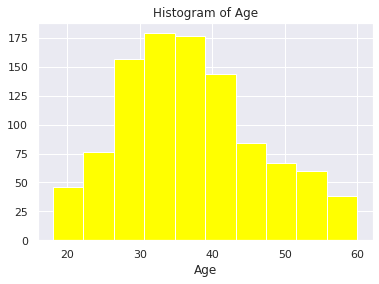

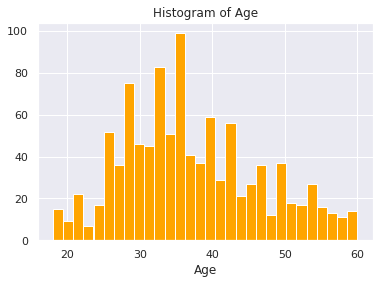

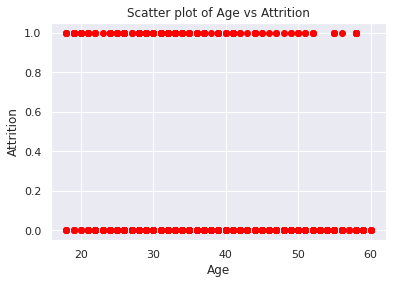

In [104]:
# Plot and modify the histogram of Age
plt.hist(df["Age"], color = "yellow")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.show()

plt.hist(df["Age"], bins = 30, color = "orange")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.show()

# Draw a scatter plot between Age and Attrition
plt.scatter(df["Age"],df["Attrition"], c = "red")
plt.title("Scatter plot of Age vs Attrition")
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.show()

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


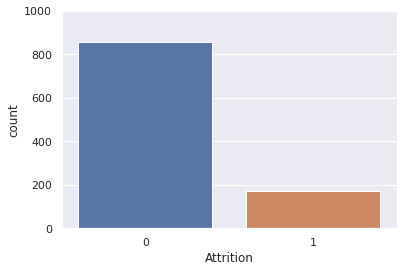

In [105]:
# Get a series of counts of values of Attrition
print(pd.Series(df["Attrition"]).value_counts())

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.set(style="darkgrid")
ax = sns.countplot(x = "Attrition", data = df)
plt.ylim(0, 1000)
plt.show()

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                       92                150            614
1                       10                 47            115


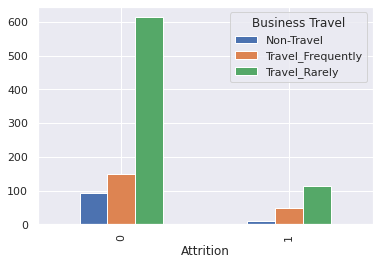

Attrition            0    1
BusinessTravel             
Non-Travel          92   10
Travel_Frequently  150   47
Travel_Rarely      614  115


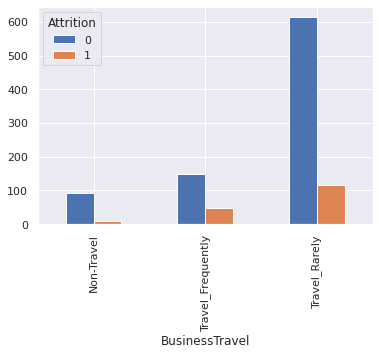

In [114]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
ct = pd.crosstab(df["Attrition"],df["BusinessTravel"])
print(ct)
ct.plot.bar()
plt.legend(title = "Business Travel")
plt.show()
ct1 = pd.crosstab(df["BusinessTravel"],df["Attrition"])
print(ct1)
ct1.plot.bar()
plt.legend(title = "Attrition")
plt.show()

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

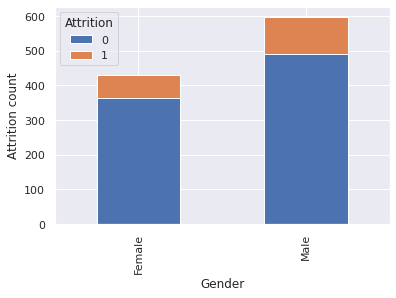

In [111]:
# Draw a stacked bar chart between Attrition and Gender 
cross_tab=pd.crosstab(df.Gender,df.Attrition)
cross_tab.plot.bar(stacked=True)
plt.ylabel('Attrition count')
plt.show()

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

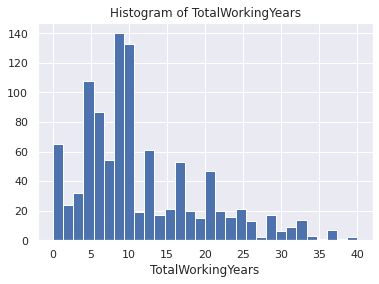

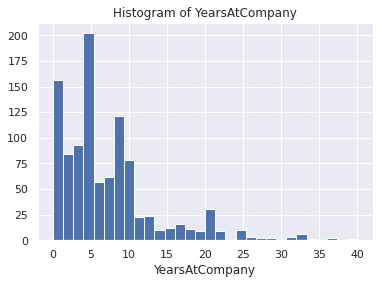

In [91]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df["TotalWorkingYears"], bins = 30)
plt.title("Histogram of TotalWorkingYears")
plt.xlabel("TotalWorkingYears")
plt.show()

# Draw a histogram of YearsAtCompany
plt.hist(df["YearsAtCompany"], bins = 30)
plt.title("Histogram of YearsAtCompany")
plt.xlabel("YearsAtCompany")
plt.show()

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


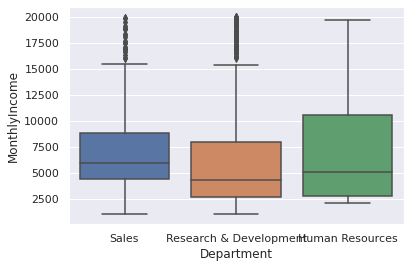

In [116]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
sns.boxplot(data = df, x = df["Department"], y = df["MonthlyIncome"])

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

([<matplotlib.patches.Wedge at 0x7f23cadcfc88>,
 [Text(0.8542961340812947, 0.6929488547459725, 'Sales Executive'),
  Text(-0.45945693362420414, 0.9994495115535571, 'Research Scientist'),
  Text(-1.0981462091349679, -0.06383496974620964, 'Laboratory Technician'),
  Text(-0.6503653604759383, -0.8871442373667334, 'Manufacturing Director'),
  Text(-0.05712202505487643, -1.0985158507065933, 'Healthcare Representative'),
  Text(0.47770465248811617, -0.9908573383647155, 'Manager'),
  Text(0.841447151537986, -0.708496077031207, 'Sales Representative'),
  Text(1.03505987357499, -0.37235877606808926, 'Research Director'),
  Text(1.09597534812125, -0.0940108308148859, 'Human Resources')])

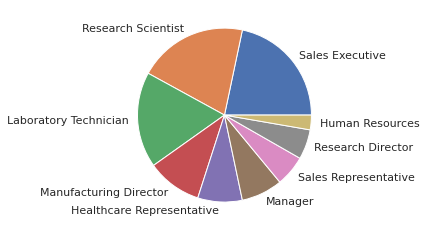

In [98]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
plt.pie(pd.Series(df["JobRole"]).value_counts(), labels = pd.Series(df["JobRole"]).unique())